# Data Preprocessing

In [ ]:
# import libraries
import pandas as pd

In [ ]:
# read csv file
study = pd.read_csv('/content/Expanded_data_with_more_features.csv', index_col=0)

In [ ]:
# display data
study.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [ ]:
# drop unwanted columns
# study = study.drop(['Gender', 'EthnicGroup', 'LunchType', 'PracticeSport', 'TransportMeans'], axis=1, errors='ignore')
# study.head()

In [ ]:
# check is there missing values
study.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
# drop missing values
study = study.dropna()
study.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [ ]:
# add a new columns, which is the average score
study.loc[:, 'AvgScore'] = study.loc[:, 'MathScore':'WritingScore'].mean(axis=1)
study.head()

<ipython-input-7-ad65191639bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study.loc[:, 'AvgScore'] = study.loc[:, 'MathScore':'WritingScore'].mean(axis=1)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AvgScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,89.000000
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.000000


In [ ]:
# checks the number of data
study.shape

(19243, 15)

# Graph

In [ ]:
# import library
import matplotlib.pyplot as plt

In [ ]:
# define the function to plot bar chart
def bar_chart(xname, yname):
  colours = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'gray']  # the colours for each bar
  st = study.groupby(xname)[yname].mean().sort_values().plot(kind='bar', color=colours)

  # st.set_title('')
  st.set_xlabel(xname)
  st.set_ylabel(yname)
  
  for i in st.patches:
      plt.annotate(str(round(i.get_height(), 2)), (i.get_x() + i.get_width()/2, i.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  plt.show()

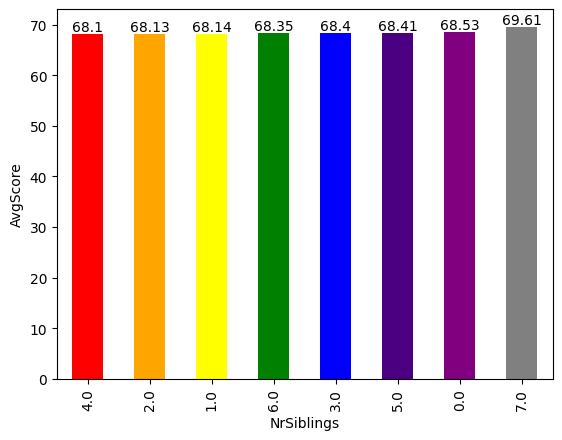

In [ ]:
# function tester
bar_chart('NrSiblings', 'AvgScore')

In [ ]:
# save the columns into a list
col = list(study.columns)

In [ ]:
# the columns for x axis
xcol = col[:-4]
xcol

['Gender',
 'EthnicGroup',
 'ParentEduc',
 'LunchType',
 'TestPrep',
 'ParentMaritalStatus',
 'PracticeSport',
 'IsFirstChild',
 'NrSiblings',
 'TransportMeans',
 'WklyStudyHours']

In [ ]:
# the columns for y axis
ycol = col[-4:]
ycol

['MathScore', 'ReadingScore', 'WritingScore', 'AvgScore']

MathScore


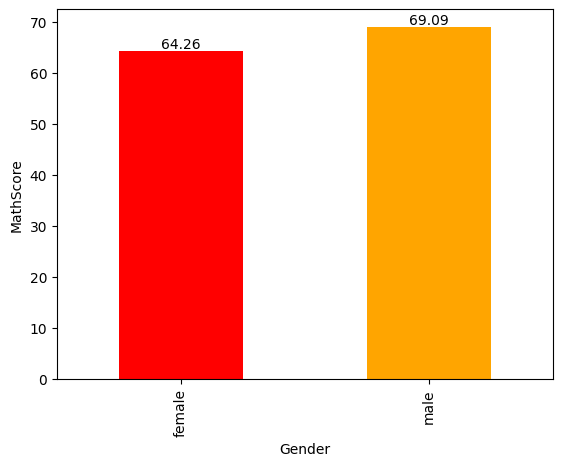

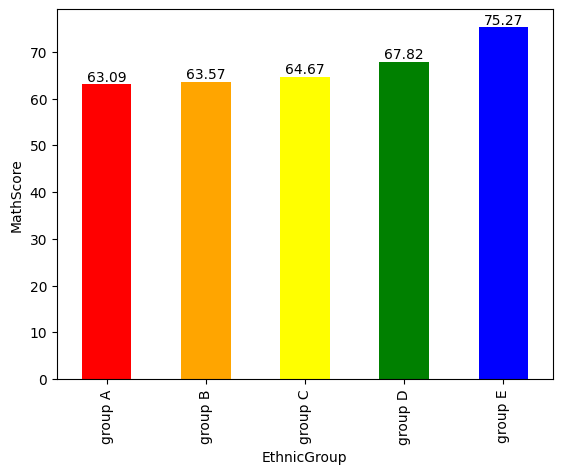

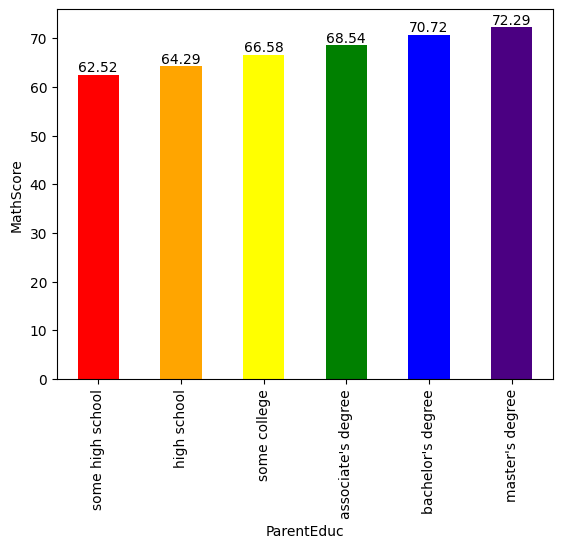

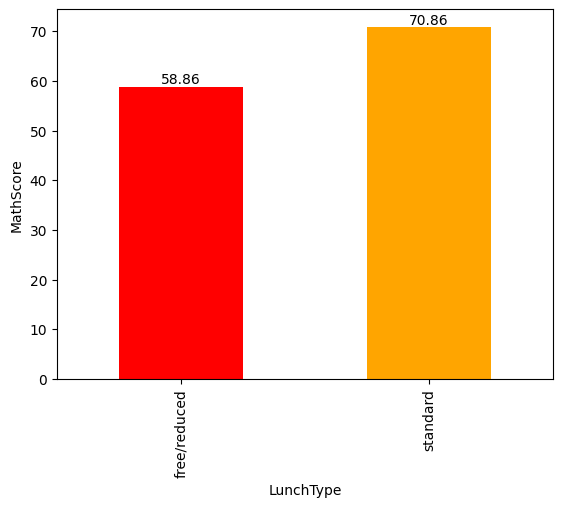

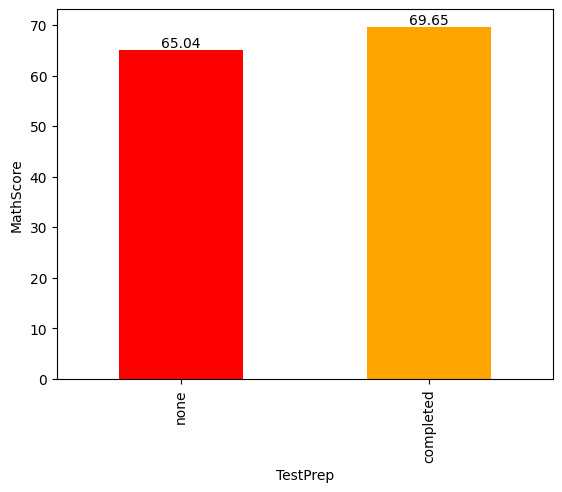

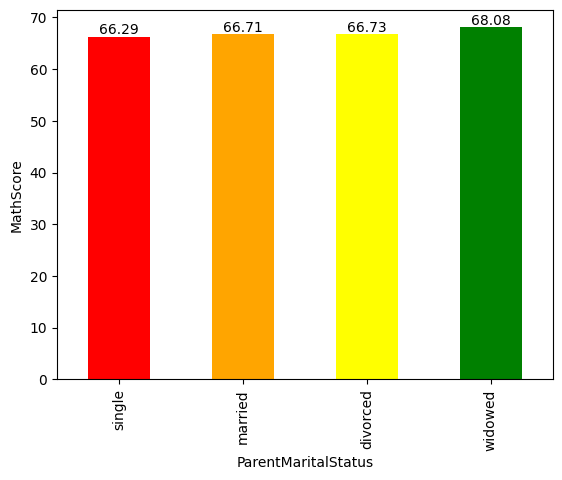

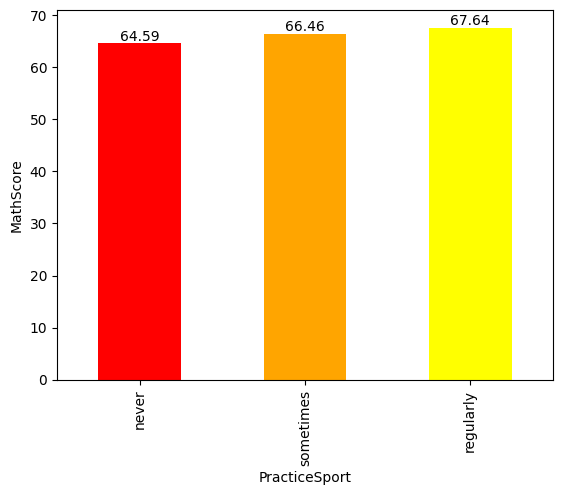

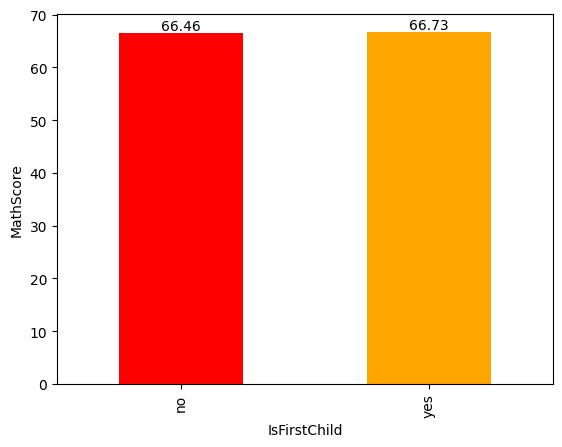

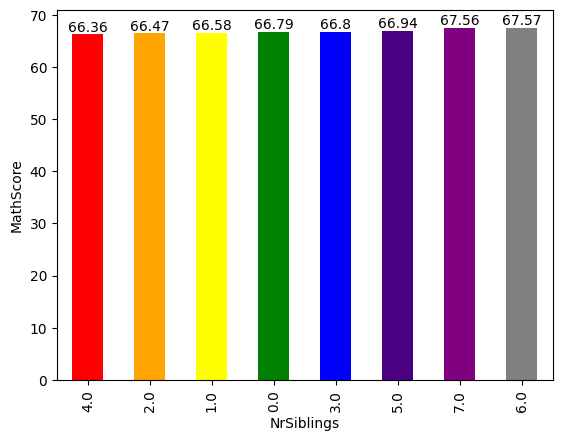

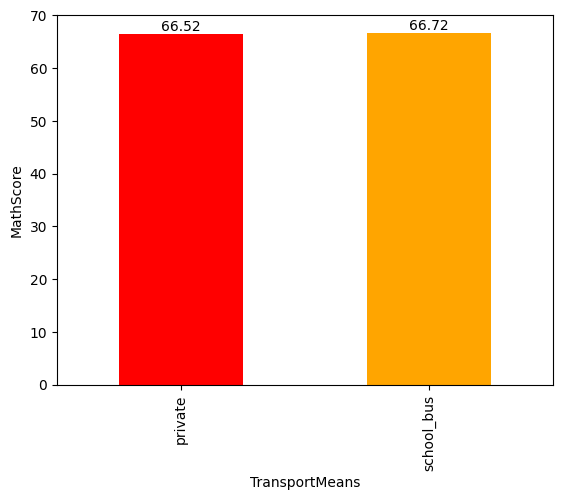

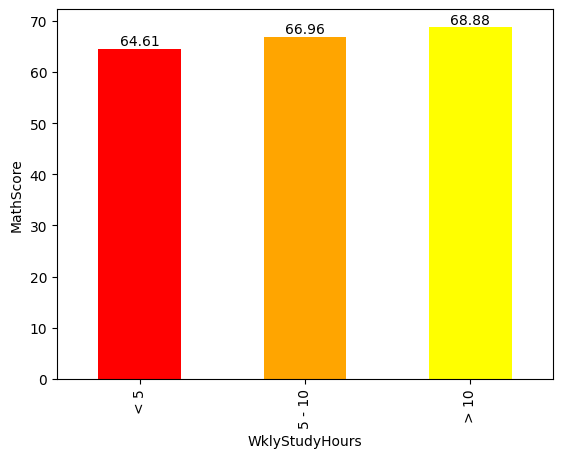

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ReadingScore


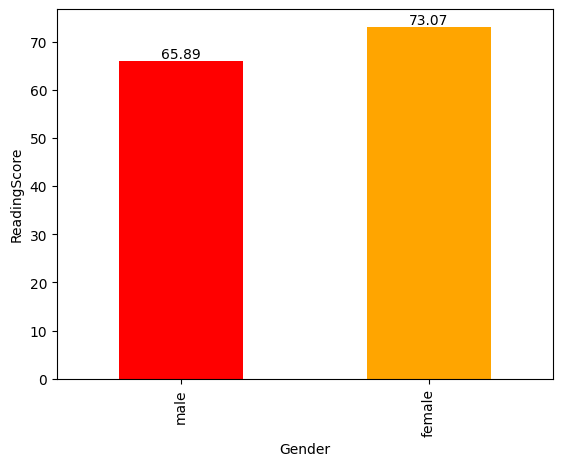

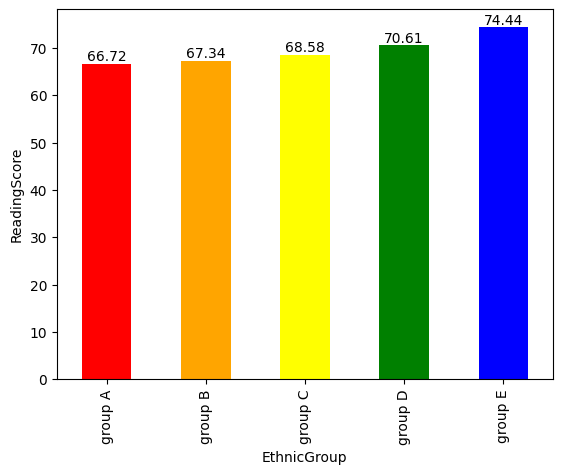

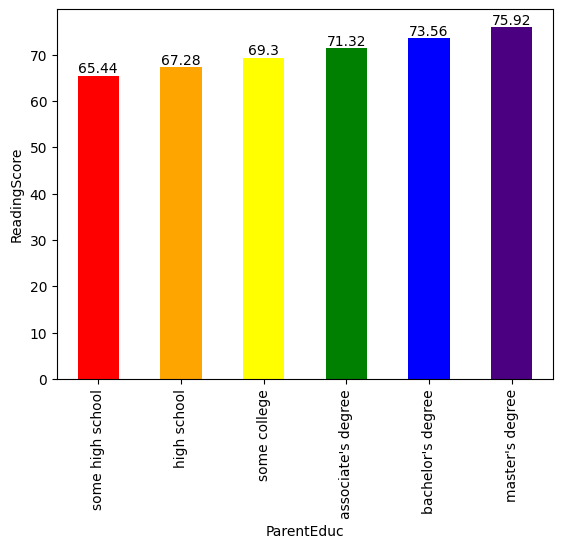

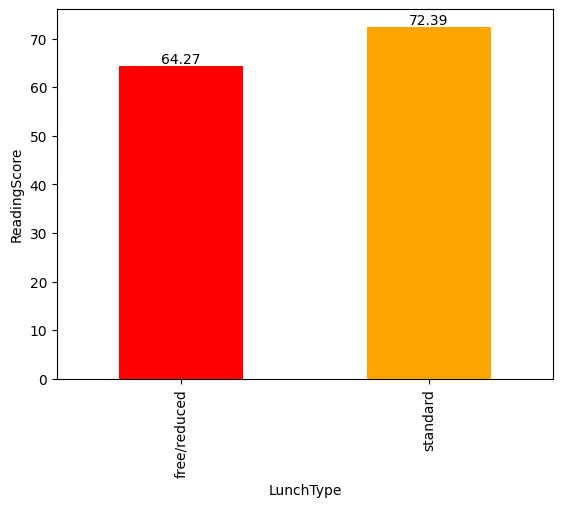

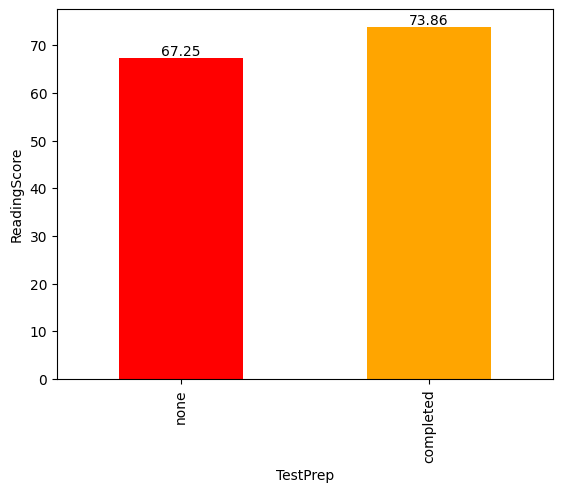

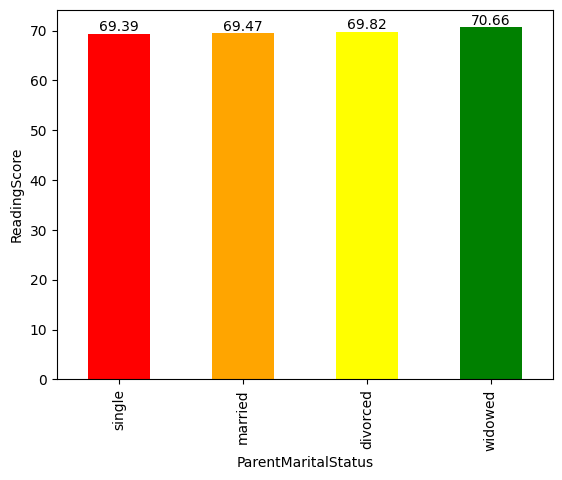

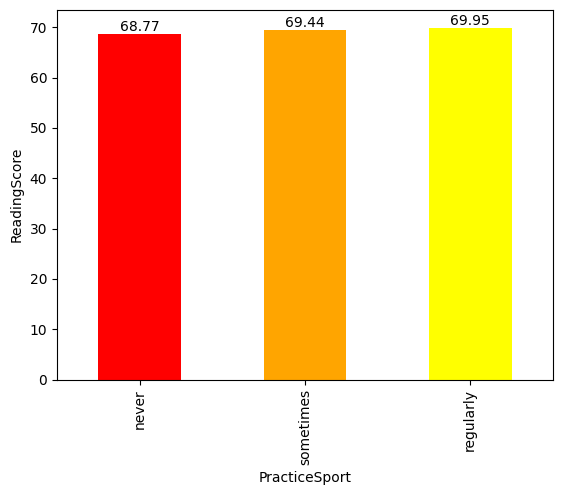

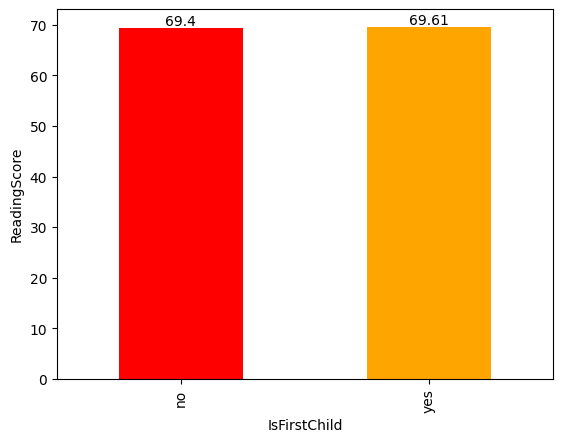

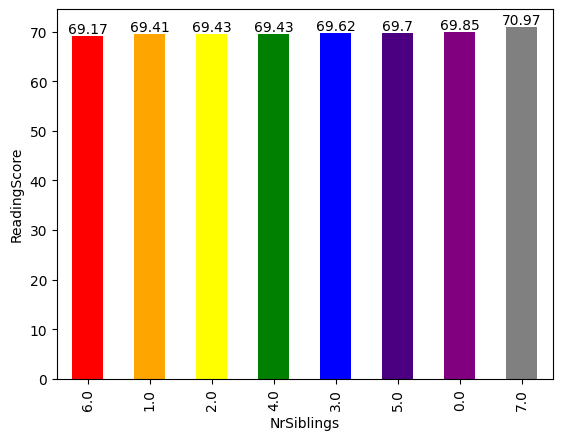

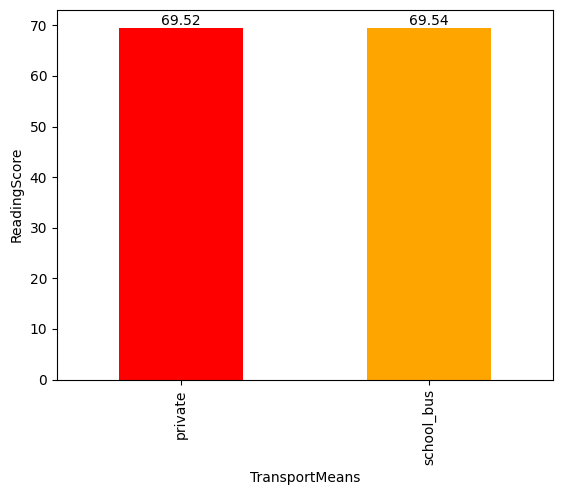

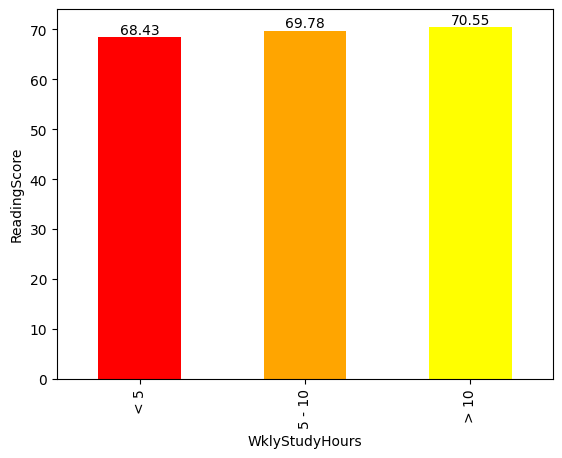

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
WritingScore


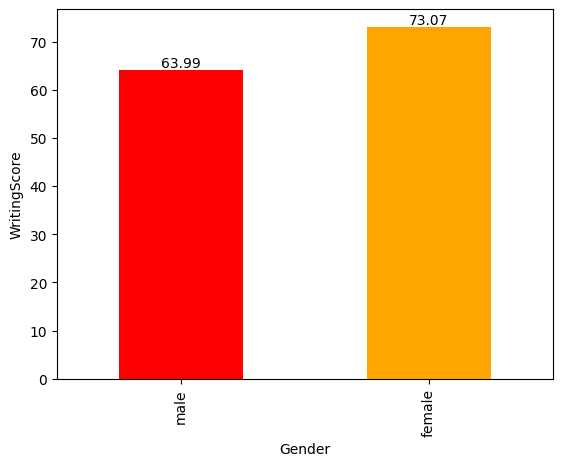

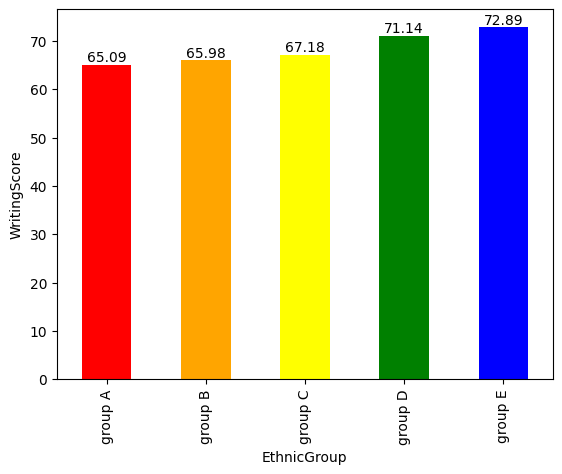

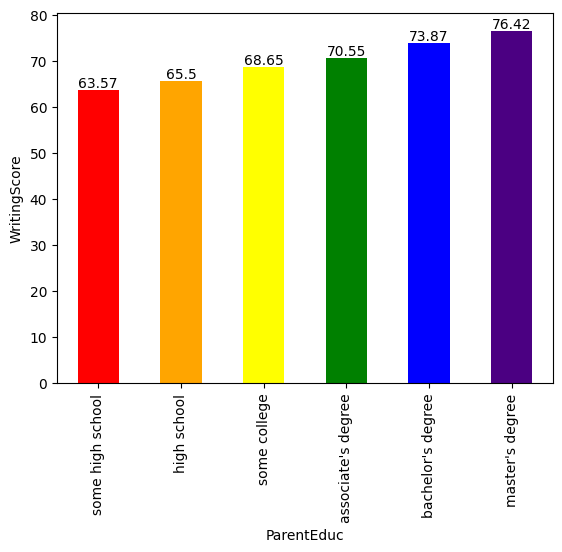

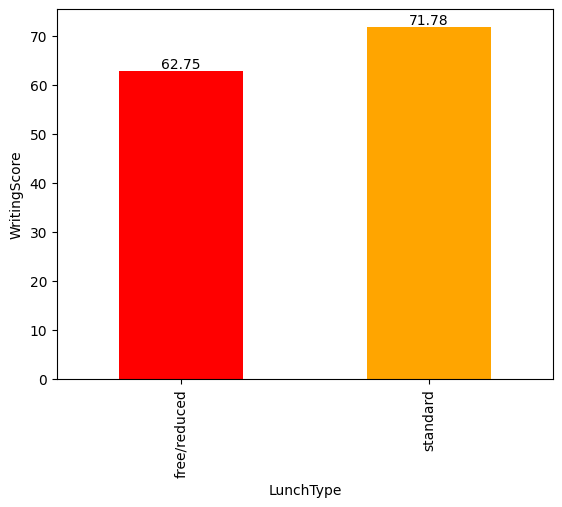

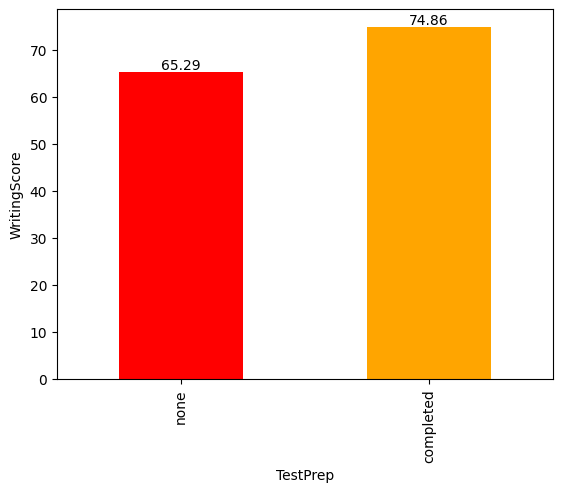

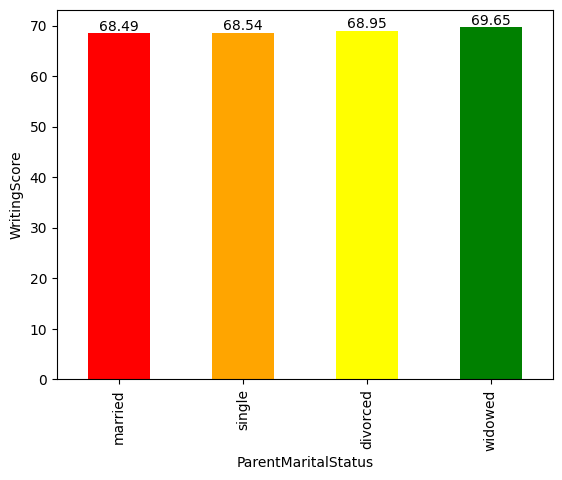

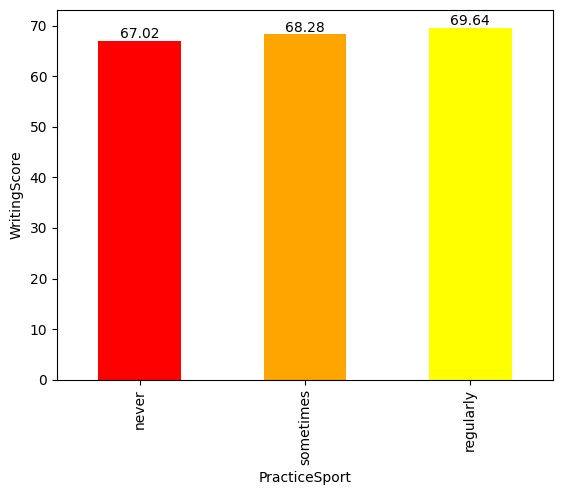

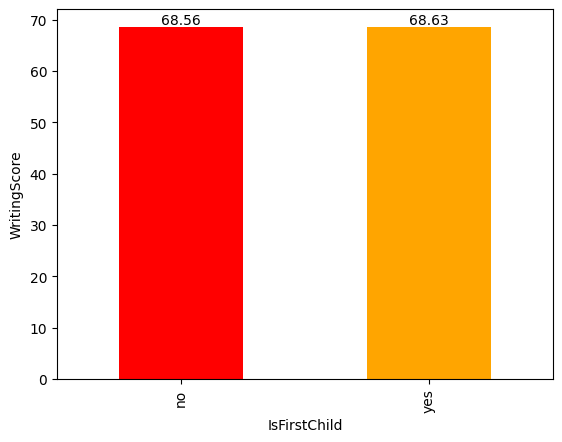

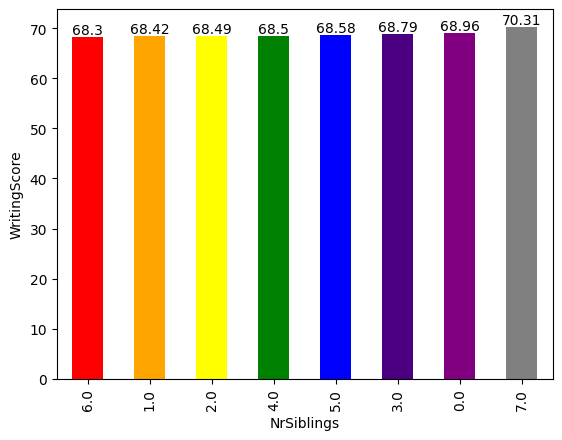

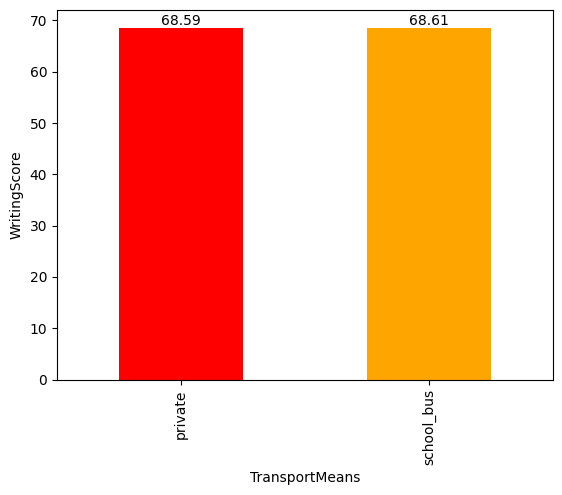

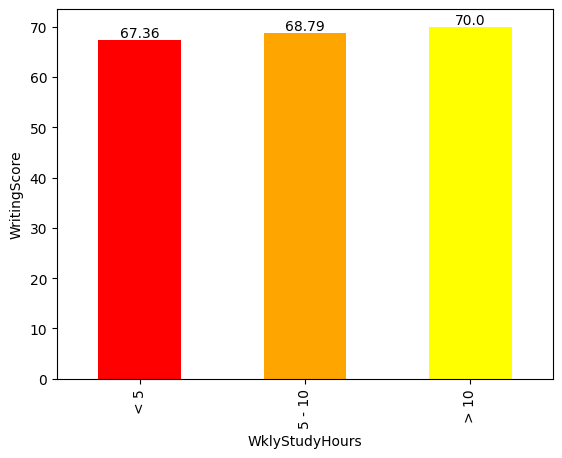

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
AvgScore


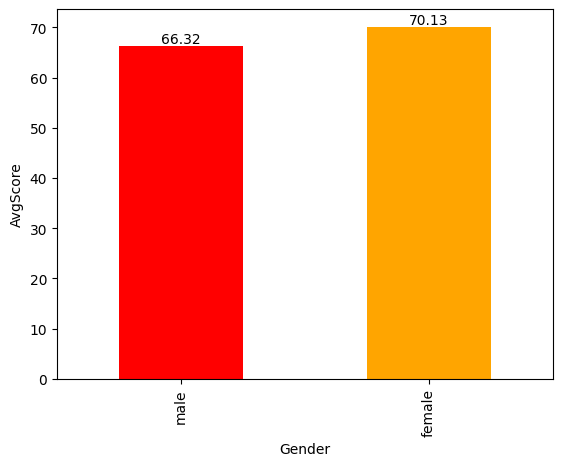

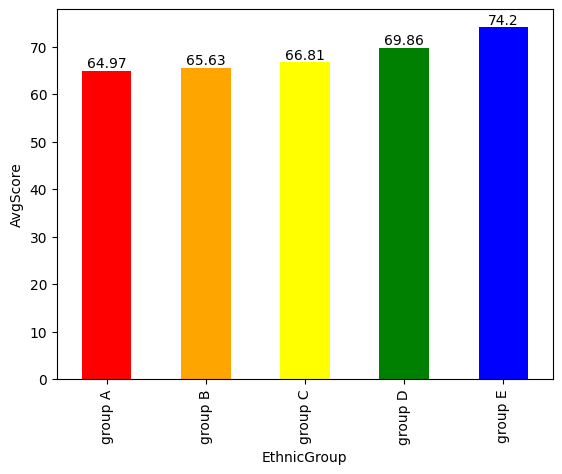

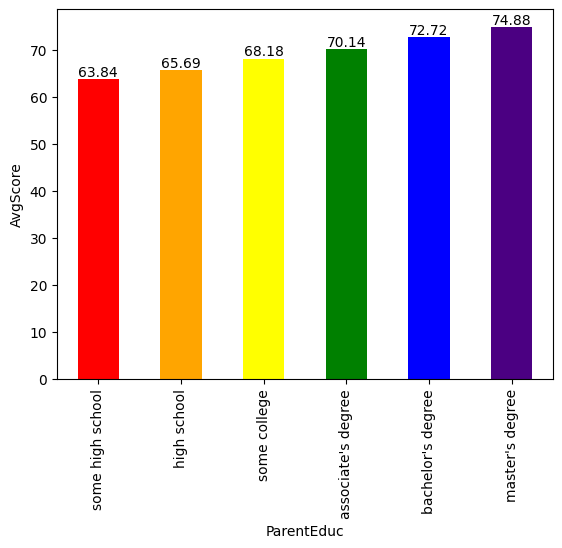

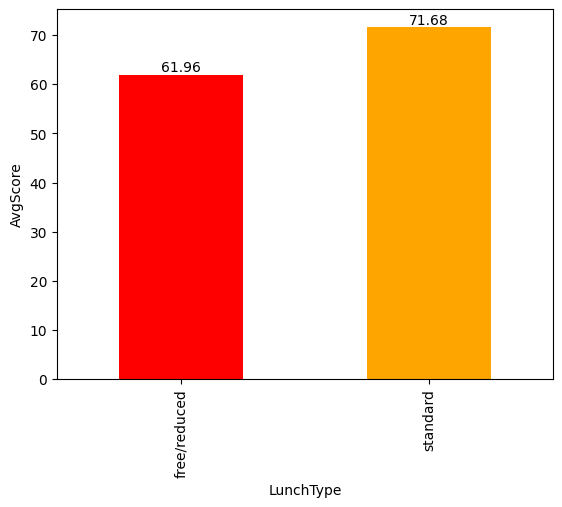

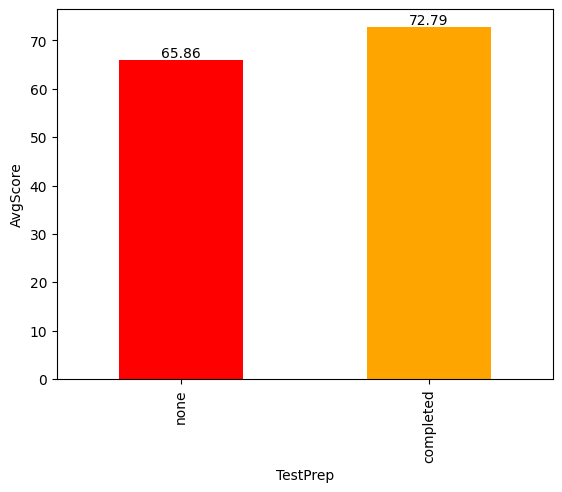

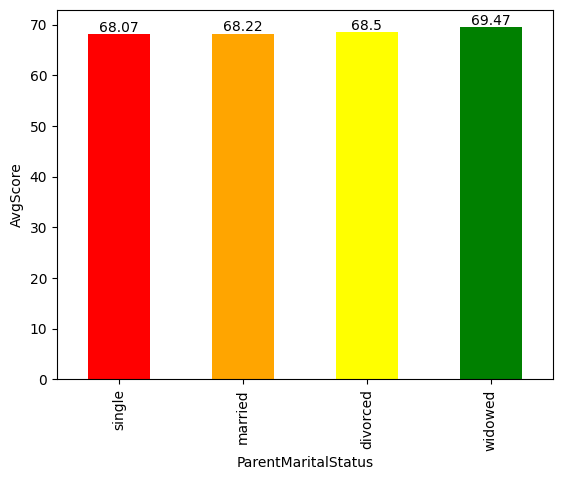

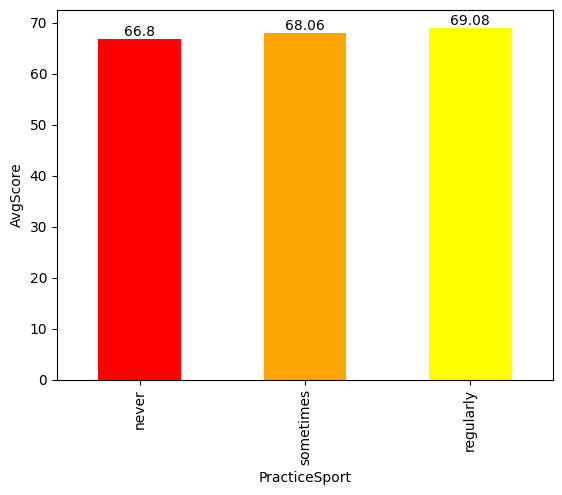

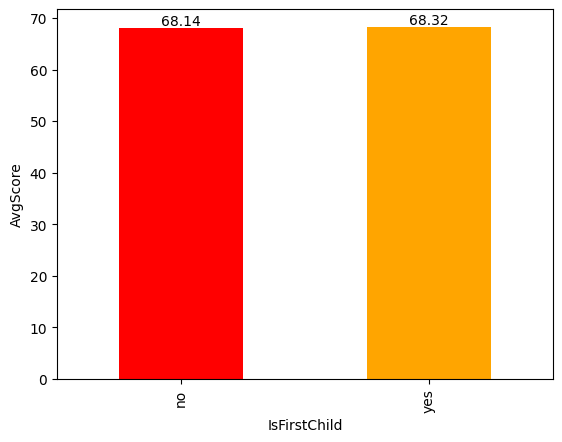

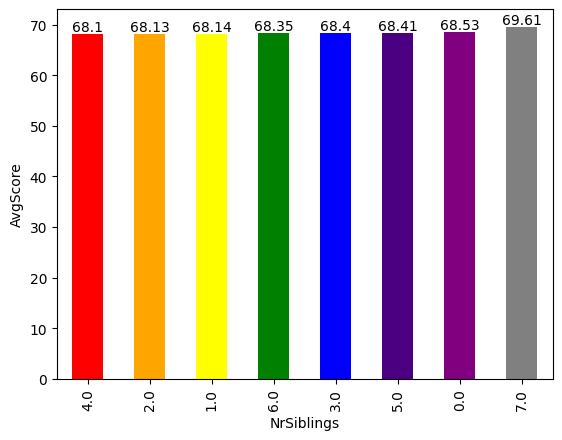

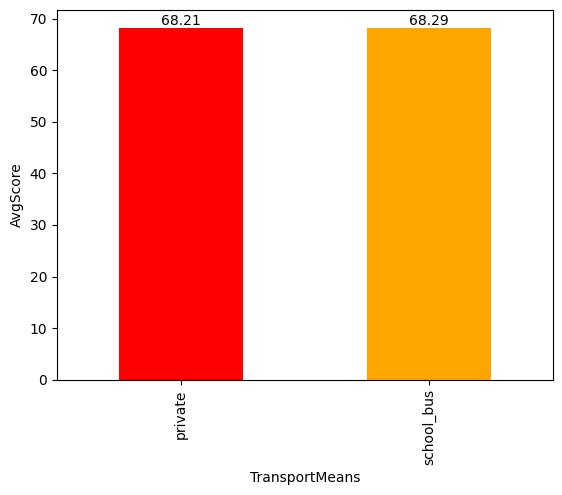

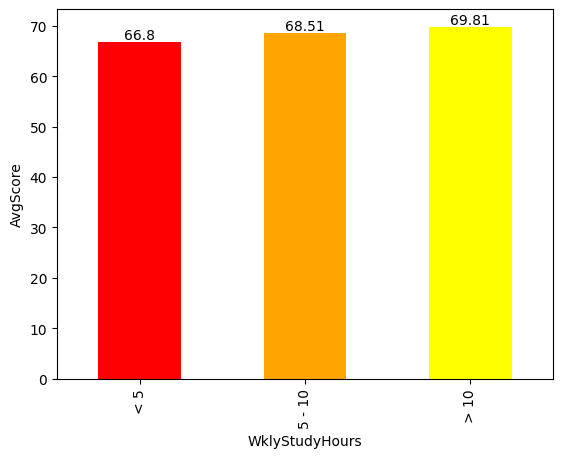

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [ ]:
# generate the graphs
for y in ycol:
  print(y)
  for x in xcol:
    bar_chart(x, y)
  print('%'*100)